## Задание 1. Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [4]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(4, input_shape=(8,), activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [5]:
from keras.optimizers import SGD
INIT_LR = 0.01
opt = SGD(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='mse', metrics='mae')

#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [6]:
%%time
EPOCHS = 200
H = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=1000, validation_data=(X_test, Y_test))

Epoch 1/200
17/17 [==============================] - 1s 11ms/step - loss: 33955437144719614809605144576.0000 - mae: 49502585094144.0000 - val_loss: 98830497410235178252500992.0000 - val_mae: 9941351923712.0000
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 73568529951517337953763328.0000 - mae: 8537751158784.0000 - val_loss: 49725333861310628261527552.0000 - val_mae: 7051619074048.0000
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 37015077555137950527782912.0000 - mae: 6056012414976.0000 - val_loss: 25018664127757648167698432.0000 - val_mae: 5001865854976.0000
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 18623669101963509139243008.0000 - mae: 4295661191168.0000 - val_loss: 12587829877441485867057152.0000 - val_mae: 3547932917760.0000
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 9370264036374477270941696.0000 - mae: 3047006142464.0000 - val_loss: 6333407688400298173267968.0000 - 

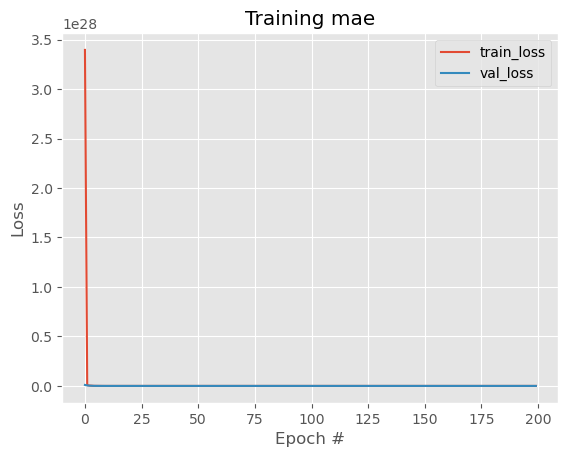

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()


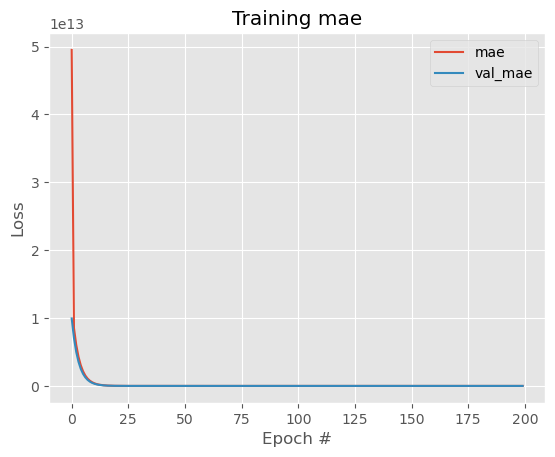

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["mae"], label="mae")
plt.plot(N, H.history["val_mae"], label="val_mae")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()

In [9]:
from sklearn.metrics import mean_absolute_error
Y_predict = model.predict(X_test)
print(f'Средняя ошибка: ${int(mean_absolute_error(Y_predict, Y_test)*100000)}')

129/129 [==============================] - 0s 1ms/step
Средняя ошибка: $90696


#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Модель обучается плохо, так как даныне не нормализованны, нормализуем данные, а также добавим дополнительные слои.

In [10]:
from sklearn.preprocessing import MinMaxScaler


model = Sequential([
    Dense(256, input_shape=(8,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Нормализуем данные
mms = MinMaxScaler()
X_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

INIT_LR = 0.01
opt = SGD(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='mse', metrics='mae')

In [11]:
%%time
EPOCHS = 250
H = model.fit(X_norm, Y_train, epochs=EPOCHS, batch_size=1000, validation_data=(X_test_norm, Y_test))

Epoch 1/250
17/17 [==============================] - 0s 11ms/step - loss: 3.8293 - mae: 1.5702 - val_loss: 2.0476 - val_mae: 1.0311
Epoch 2/250
17/17 [==============================] - 0s 5ms/step - loss: 1.5323 - mae: 0.9114 - val_loss: 1.2416 - val_mae: 0.8725
Epoch 3/250
17/17 [==============================] - 0s 6ms/step - loss: 1.2496 - mae: 0.8799 - val_loss: 1.2074 - val_mae: 0.8761
Epoch 4/250
17/17 [==============================] - 0s 7ms/step - loss: 1.2185 - mae: 0.8748 - val_loss: 1.1808 - val_mae: 0.8671
Epoch 5/250
17/17 [==============================] - 0s 6ms/step - loss: 1.1899 - mae: 0.8644 - val_loss: 1.1561 - val_mae: 0.8627
Epoch 6/250
17/17 [==============================] - 0s 6ms/step - loss: 1.1607 - mae: 0.8551 - val_loss: 1.1297 - val_mae: 0.8556
Epoch 7/250
17/17 [==============================] - 0s 5ms/step - loss: 1.1303 - mae: 0.8456 - val_loss: 1.0962 - val_mae: 0.8350
Epoch 8/250
17/17 [==============================] - 0s 5ms/step - loss: 1.0972 - 

#### 1.6. Сделайте предсказания на тестовых данных

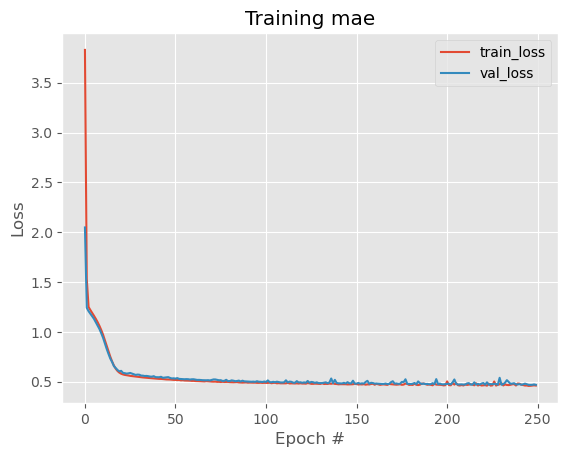

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()

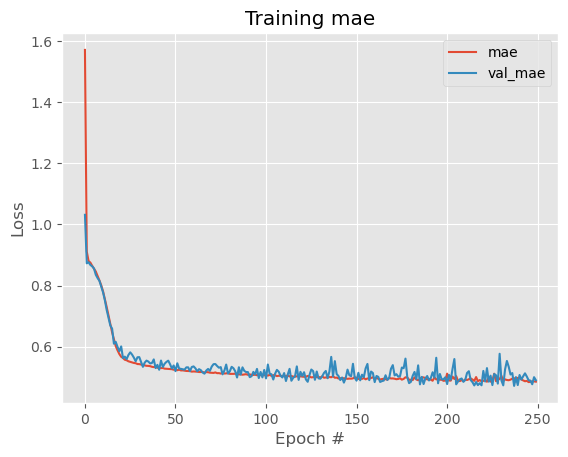

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["mae"], label="mae")
plt.plot(N, H.history["val_mae"], label="val_mae")
plt.title("Training mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
_ = plt.legend()

#### 1.7. Посчитайте метрику качества на тестовых данных

In [14]:
from sklearn.metrics import mean_absolute_error
Y_predict = model.predict(X_test_norm)
print(f'Средняя ошибка: ${int(mean_absolute_error(Y_predict, Y_test)*100000)}')

129/129 [==============================] - 0s 894us/step
Средняя ошибка: $49045


Как видно, нормализовав данные и изменив модель нейросети, удалось снизить ошибку почти в два раза.

# Задание 2. Нейронная сеть для классификации изображений

## Обучение нейронной сети для классификации изображений
В качестве датасета взяты изображения дорог в Бразилии разделенные на три категории - асфальтированные, мощенные и грунтовые

Источник: https://github.com/thiagortk/Road-surface-detection-and-differentiation-considering-surface-damages

Обучение производилось на локально развернутом jupyter-notebook

In [15]:
# Импортируем необходимые библиотеки
import matplotlib
matplotlib.use("Agg")
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

In [16]:
# Загружаем изображения
print("[INFO] loading images...")
data = []
labels = []
imagePaths = sorted(list(paths.list_images(r".\data")))
print(f"[INFO] Number of loading images {len(imagePaths)}")
random.shuffle(imagePaths)

# Извлекаем метки 
for imagePath in imagePaths:	
	try:
		image = cv2.imread(imagePath)
		image = cv2.resize(image, (32, 32)).flatten()
		data.append(image)
		label = imagePath.split(os.path.sep)[-2] 	
		labels.append(label)
	except Exception as e:
		print(str(e))

[INFO] loading images...
[INFO] Number of loading images 20760


In [17]:
# Нормализация данных
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
# Разбиваем данные на треннировачные и тестовые
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)


In [18]:
# Бинаризируем лейблы
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [19]:
# Архитектура модели
# 3072-1024-512-3
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [20]:
# Обучаем нейросеть
INIT_LR = 0.01
EPOCHS = 100
print("[INFO] training network...")
opt = SGD(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
              metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
              epochs=EPOCHS, batch_size=1000)

[INFO] training network...
Epoch 1/100
16/16 [==============================] - 1s 26ms/step - loss: 0.9577 - accuracy: 0.5357 - val_loss: 0.9330 - val_accuracy: 0.5539
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.8253 - accuracy: 0.6085 - val_loss: 0.7657 - val_accuracy: 0.6366
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.7634 - accuracy: 0.6487 - val_loss: 0.7325 - val_accuracy: 0.6592
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.7279 - accuracy: 0.6670 - val_loss: 0.7212 - val_accuracy: 0.6690
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.7079 - accuracy: 0.6833 - val_loss: 0.7380 - val_accuracy: 0.6478
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.7043 - accuracy: 0.6781 - val_loss: 0.6820 - val_accuracy: 0.6915
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6790 - accuracy: 0.7018 - val_loss: 0.6601 - v

[INFO] evaluating network...
163/163 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

     asphalt       0.77      0.99      0.86      2093
       paved       0.98      0.65      0.78      1718
     unpaved       0.98      0.96      0.97      1379

    accuracy                           0.87      5190
   macro avg       0.91      0.87      0.87      5190
weighted avg       0.89      0.87      0.86      5190



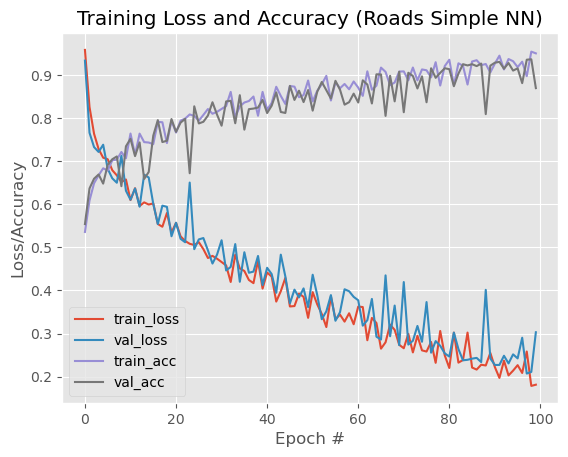

In [21]:
%matplotlib inline
# Оценка нейросети
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

# Графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Roads Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [22]:
# Сохранение модели
print("[INFO] serializing network and label binarizer...")
model.save(r".\models\roads_model.h5", save_format="h5")
with open(r".\models\roads_label_bin", "wb") as f:
  f.write(pickle.dumps(lb))

[INFO] serializing network and label binarizer...


## Проверка обученной модели пользовательскими данными

In [23]:
from keras.models import load_model
import pickle
import cv2

In [24]:
# Загружаем модель
from keras import models    

# Модель можно скачать здесь - https://drive.google.com/drive/folders/1ZLgm-d6DScHq8aA4_yvmCkHRgE-sOnOv?usp=share_link
print("[INFO] loading network and label binarizer...")
model = models.load_model(r".\models\roads_model.h5")
lb = pickle.loads(open(r".\models\roads_label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [25]:
# Функция для тестирования модели на пользовательских изображениях
def test_image(imagePath):
  image = cv2.imread(imagePath)
  output = image.copy()
  image = cv2.resize(image, (32, 32))
  image = image.flatten()
  image = image.astype("float") / 255.0
  image = image.reshape((1, image.shape[0]))
  # По модели находим прогноз для загруженного изображения
  preds = model.predict(image)
  print(preds)
  # Выводим прогноз
  i = preds.argmax(axis=1)[0]
  label = lb.classes_[i]
  text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
  _ = cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
    (0, 0, 255), 2)
  plt.figure()
  plt.axis('off')
  plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

### Изображение дороги #1

1/1 [==============================] - 0s 35ms/step
[[0.95390826 0.040416   0.0056757 ]]


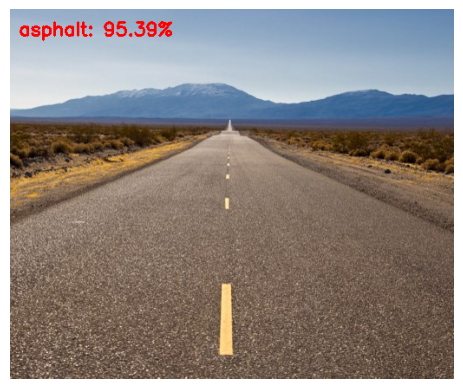

In [26]:
test_image(r".\test_data\test_asphalt_1.jpg")

### Изображение дороги #2

1/1 [==============================] - 0s 15ms/step
[[0.2772597  0.16359212 0.55914813]]


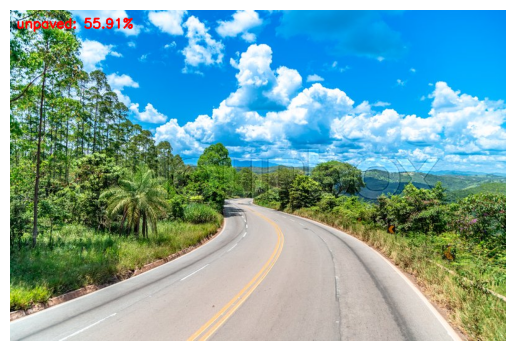

In [27]:
test_image(r".\test_data\test_asphalt_2.jpg")

### Изображение мощенной дороги #1

---



1/1 [==============================] - 0s 14ms/step
[[0.8128142  0.12474161 0.06244415]]


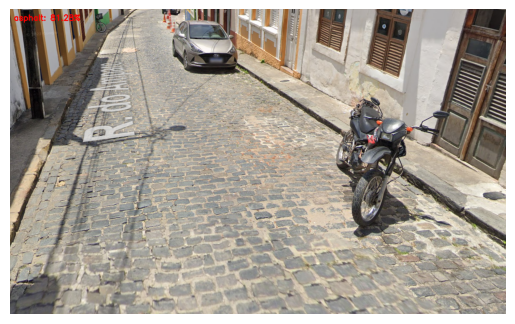

In [28]:
test_image(r".\test_data\test_paved_1.png")

### Изображение мощенной дороги #2

---



1/1 [==============================] - 0s 14ms/step
[[9.160872e-01 8.316795e-02 7.447711e-04]]


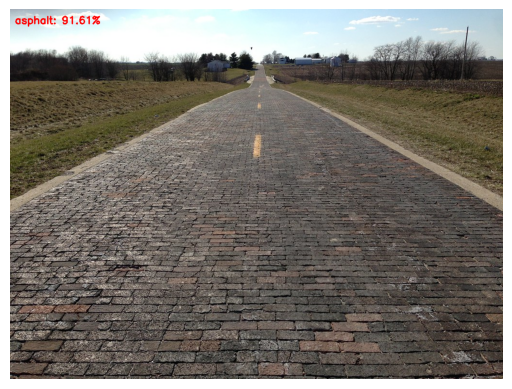

In [29]:
test_image(r".\test_data\test_paved_2.jpg")

### Изображение грунтовой дороги #1



1/1 [==============================] - 0s 16ms/step
[[0.03384123 0.01454853 0.95161027]]


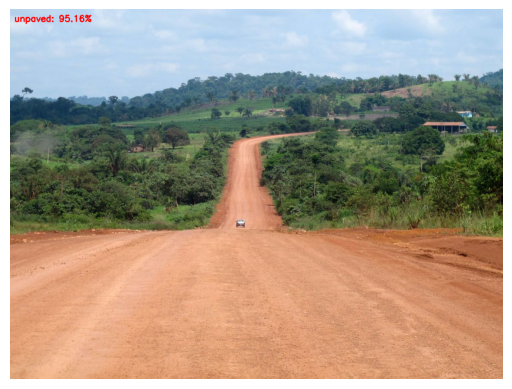

In [30]:
test_image(r".\test_data\test_unpaved_1.jpg")

### Изображение грунтовой дороги #2


1/1 [==============================] - 0s 14ms/step
[[0.9539254  0.04264578 0.00342875]]


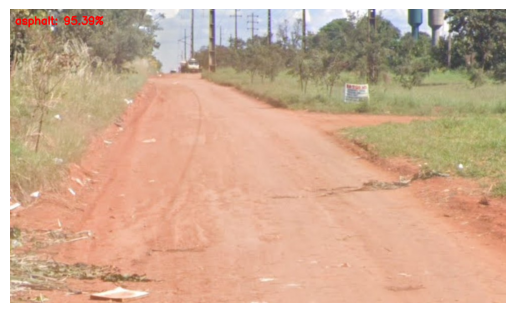

In [31]:
test_image(r".\test_data\test_unpaved_2.jpg")

### Вывод
После проверки изображениями из интернета, становится ясно, что модель дает верные предсказания только в случае если изображения по углу съемки и в целом похожи по виду на те, по которым происходило обучение, если же вид изображения изменяется, то ошибка становится довольно большой.